Exercise 3: Clustering

1. Function to create synthetic data - please do not change

In [ ]:
#https://github.com/Lamaratamleh/lamar3.git
import numpy as np
from sklearn.datasets import make_blobs, make_moons
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
import pandas as pd


def create_data(the_noise, n1_samples, n2_samples, n3_samples, n4_samples):
  # 1
  X_1, y_1 = make_blobs(
    n_samples=n1_samples,
    centers=4,
    random_state=42)

  # 2
  X_2, y_2 = make_moons(
      n_samples=n2_samples,
      noise=the_noise,
      random_state=42
  )

  X_2[:, 0] += 10
  X_2[:, 1] += 10

  # 3
  rng = np.random.RandomState(42)
  angles = rng.rand(n3_samples) * 2 * np.pi
  r = 5.0 + rng.randn(n3_samples) * the_noise
  X_3 = np.column_stack((r * np.cos(angles), r * np.sin(angles)))
  X_3[:, 0] += 20


  # combine
  X = np.vstack((X_1, X_2, X_3))


  return X

2. Call create_data and visualize the data

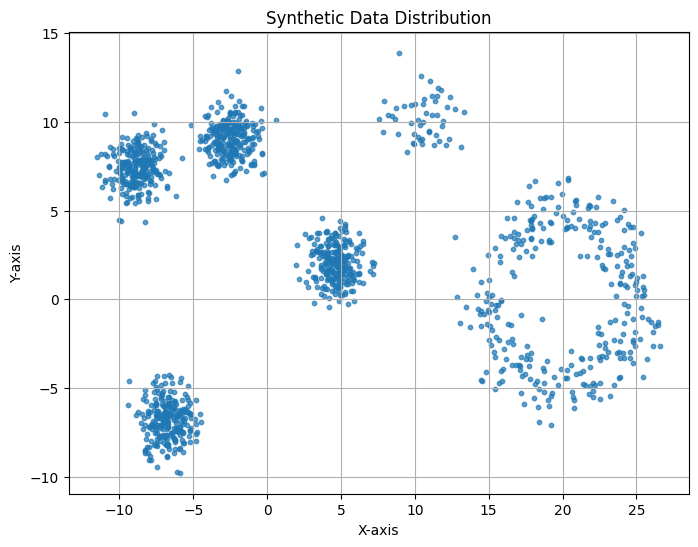

In [ ]:

X = create_data(1.0, 1000, 50, 300, 200)

# Data visuazliation is here:
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], s=10, alpha=0.7)
plt.title("Synthetic Data Distribution")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.grid(True)
plt.show()


3. Train KMeans
- use library sklearn.cluster.KMeans
- training data: X
- explore and optimize KMeans options
- choose the number of clusters using the Silhouette Method    

In [ ]:
best_k = None
best_score = -1
results = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    results.append((k, score))
    if score > best_score:
        best_score = score
        best_k = k

print(f"Best K for KMeans: {best_k}, Silhouette Score: {best_score}")

# הרצת KMeans עם K הטוב ביותר
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X)

Best K for KMeans: 6, Silhouette Score: 0.7251181630059241


4. Train Agglomerative Clustering

- use library sklearn.cluster.AgglomerativeClustering
- training data: X
- explore and optimize AgglomerativeClustering options
- choose the number of clusters using any method you want  

In [ ]:
agglo = AgglomerativeClustering(n_clusters=best_k)
agglo_labels = agglo.fit_predict(X)


5. Train DBSCAN
- use library sklearn.cluster.DBSCAN
- training data: X
- explore and optimize DBSCAN options


In [ ]:
best_eps = None
best_dbscan_score = -1
dbscan_results = []

for eps in np.arange(0.3, 2.0, 0.1):
    dbscan = DBSCAN(eps=eps, min_samples=5)
    labels = dbscan.fit_predict(X)
    if len(set(labels)) > 1:  # לוודא שיש יותר מאשכול אחד
        score = silhouette_score(X, labels)
        dbscan_results.append((eps, score))
        if score > best_dbscan_score:
            best_dbscan_score = score
            best_eps = eps

print(f"Best eps for DBSCAN: {best_eps}, Silhouette Score: {best_dbscan_score}")

dbscan = DBSCAN(eps=best_eps, min_samples=5)
dbscan_labels = dbscan.fit_predict(X)

Best eps for DBSCAN: 1.3000000000000005, Silhouette Score: 0.7214888016065946


6. Compare the results and choose the best method for the data


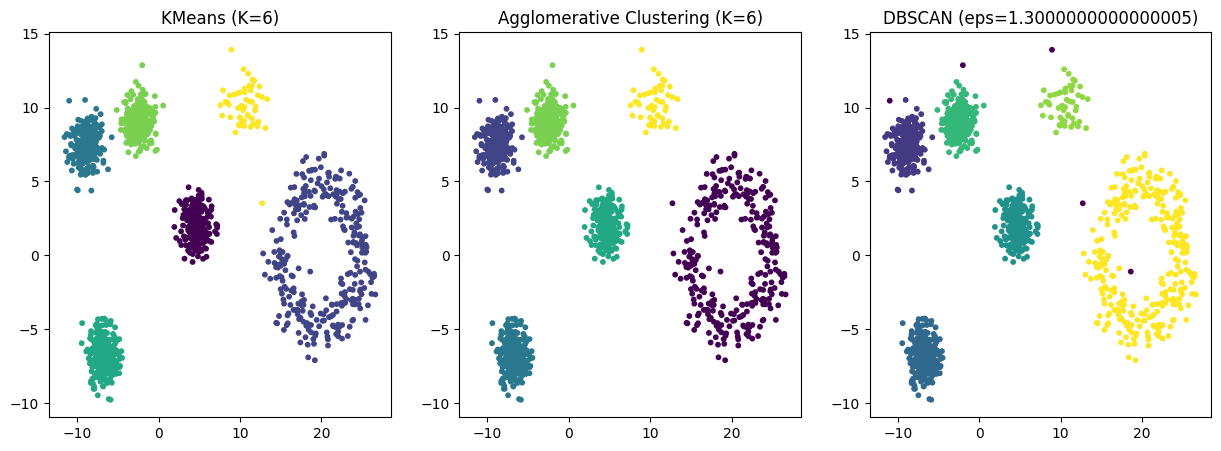

In [ ]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(X[:, 0], X[:, 1], c=kmeans_labels, cmap="viridis", s=10)
plt.title(f"KMeans (K={best_k})")

plt.subplot(1, 3, 2)
plt.scatter(X[:, 0], X[:, 1], c=agglo_labels, cmap="viridis", s=10)
plt.title(f"Agglomerative Clustering (K={best_k})")

plt.subplot(1, 3, 3)
plt.scatter(X[:, 0], X[:, 1], c=dbscan_labels, cmap="viridis", s=10)
plt.title(f"DBSCAN (eps={best_eps})")

plt.show()